Courant Number (<.5): 0.064
50
100
150


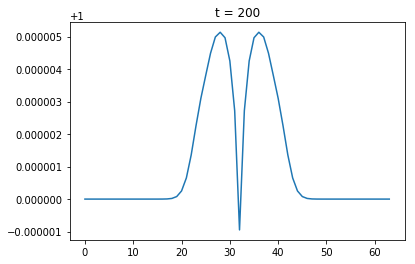

200
250
300
350


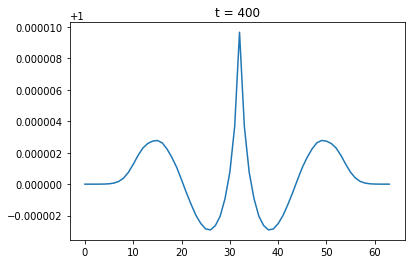

400
450
500
550


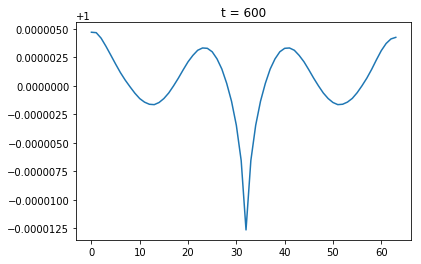

600
650
700
750


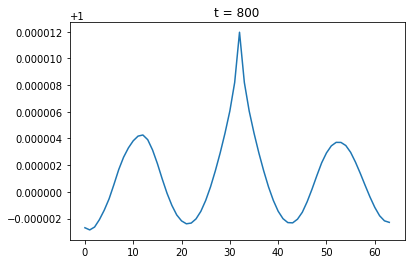

800
850
900
950
Done


In [30]:
import numpy as np
import matplotlib.pyplot as plt
DX = .01
DY = .01
LX = 1.0
LY = 1.0
DT = .001
NT = 1000
p = np.ones([NT, NX, NY])
f = np.zeros([NT, NX, NY])
w = 3.0
f[:,int(NX/2),int(NY/2)] = .1*np.sin(w * 2.0*np.pi*np.linspace(0,NT,NT) / NT)
#f[:,75,50] = .1*np.cos(w * 2.0*np.pi*np.linspace(0,NT,NT) / NT)
#f[0,int(NX/2), int(NY/2)] = 1.1
DX = 1.0 / NX
DY = 1.0 / NY
c = 1.0
#p[0,:,50] = 1.0 + .01
print 'Courant Number (<.5): ' + str( c * DT / DX)


t = 0
for i in range(1,NX-1):
    for j in range(1,NY-1):
        p[t+1,i,j] = (1.0/2.0) *( (DT*DT*c*c/(DX*DX))*( p[t,i,j-1] + p[t,i,j+1] + p[t,i-1,j] + p[t,i+1,j] - 4.0*p[t,i,j] ) +  DT*DT*f[t,i,j] + 2.0*p[t,i,j] )

for t in range(2,NT-1):
    
    #Dirichlet
    if 0:
        p[t+1,0,:] = 1.0
        p[t+1,NX-1,:] = 1.0
        p[t+1,:,0] = 1.0
        p[t+1,:,NY-1] = 1.0

    if 1: #Neumann
        for j in range(1,NX-1):
            i = 0
            p[t+1,i,j] = (DT*DT*c*c/(DX*DX))*( p[t,i,j-1] + p[t,i,j+1] + p[t,i+1,j] + p[t,i+1,j] - 4.0*p[t,i,j] ) +  DT*DT*f[t,i,j] + 2.0*p[t,i,j] - p[t-1,i,j]
            i = NX - 1
            p[t+1,i,j] = (DT*DT*c*c/(DX*DX))*( p[t,i,j-1] + p[t,i,j+1] + p[t,i-1,j] + p[t,i-1,j] - 4.0*p[t,i,j] ) +  DT*DT*f[t,i,j] + 2.0*p[t,i,j] - p[t-1,i,j]
        for i in range(1,NX-1):
            j = 0
            p[t+1,i,j] = (DT*DT*c*c/(DX*DX))*( p[t,i,j-1] + p[t,i,j+1] + p[t,i-1,j] + p[t,i+1,j] - 4.0*p[t,i,j] ) +  DT*DT*f[t,i,j] + 2.0*p[t,i,j] - p[t-1,i,j]
            j = NX - 1
            p[t+1,i,j] = (DT*DT*c*c/(DX*DX))*( p[t,i,j-1] + p[t,i,j-1] + p[t,i-1,j] + p[t,i+1,j] - 4.0*p[t,i,j] ) +  DT*DT*f[t,i,j] + 2.0*p[t,i,j] - p[t-1,i,j]
        
        if 1:
            i,j = 0,0
            p[t+1,i,j] = (DT*DT*c*c/(DX*DX))*( p[t,i,j+1] + p[t,i,j+1] + p[t,i+1,j] + p[t,i+1,j] - 4.0*p[t,i,j] ) +  DT*DT*f[t,i,j] + 2.0*p[t,i,j] - p[t-1,i,j]
            i,j = (NX-1), (NX-1)
            p[t+1,i,j] = (DT*DT*c*c/(DX*DX))*( p[t,i,j-1] + p[t,i,j-1] + p[t,i-1,j] + p[t,i-1,j] - 4.0*p[t,i,j] ) +  DT*DT*f[t,i,j] + 2.0*p[t,i,j] - p[t-1,i,j]
            i,j = 0,(NX-1)
            p[t+1,i,j] = (DT*DT*c*c/(DX*DX))*( p[t,i,j-1] + p[t,i,j-1] + p[t,i+1,j] + p[t,i+1,j] - 4.0*p[t,i,j] ) +  DT*DT*f[t,i,j] + 2.0*p[t,i,j] - p[t-1,i,j]
            i,j = (NX-1), 0
            p[t+1,i,j] = (DT*DT*c*c/(DX*DX))*( p[t,i,j+1] + p[t,i,j+1] + p[t,i-1,j] + p[t,i-1,j] - 4.0*p[t,i,j] ) +  DT*DT*f[t,i,j] + 2.0*p[t,i,j] - p[t-1,i,j]

    if t % 200 == 0:
        plt.figure()
        plt.plot( p[t,int(NX/2),:])
        plt.title( 't = ' + str(t) )
        plt.show()
    if t % 50 == 0:
        print str(t)
        
            
    for i in range(1,NX-1):
        for j in range(1,NY-1):
            p[t+1,i,j] = (DT*DT*c*c/(DX*DX))*( p[t,i,j-1] + p[t,i,j+1] + p[t,i-1,j] + p[t,i+1,j] - 4.0*p[t,i,j] ) +  DT*DT*f[t,i,j] + 2.0*p[t,i,j] - p[t-1,i,j]

print 'Done'



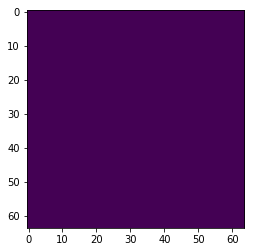

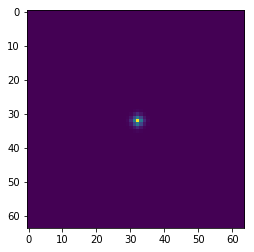

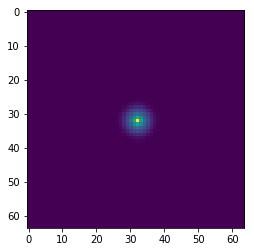

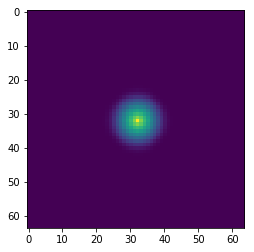

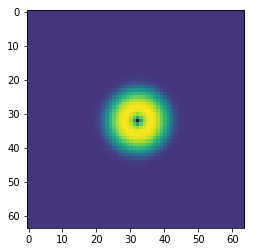

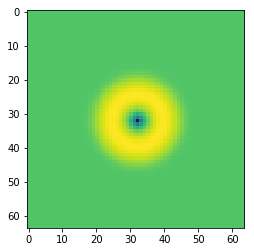

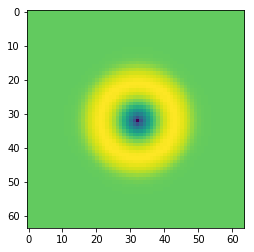

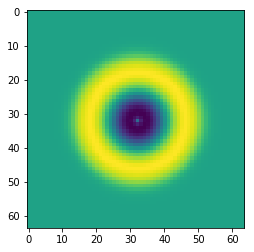

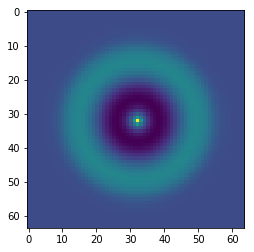

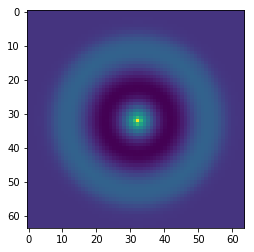

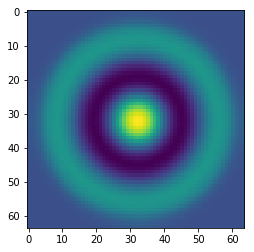

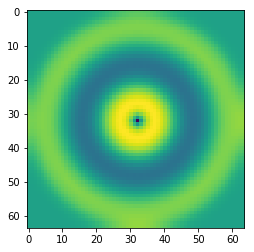

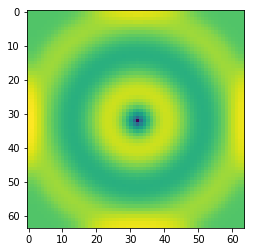

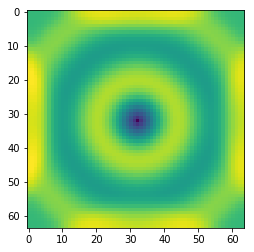

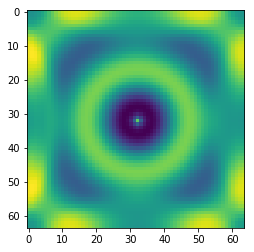

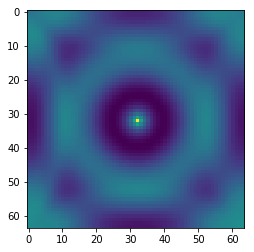

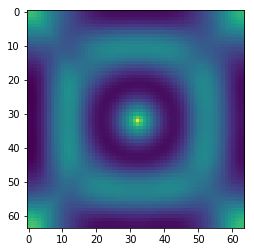

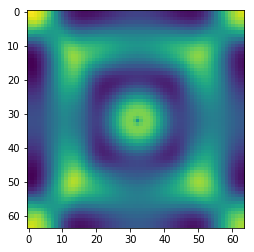

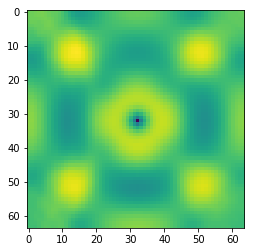

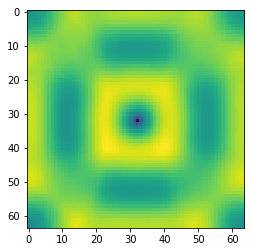

In [31]:
for t in range(0,NT,50):
    plt.figure()
    plt.imshow( p[t,:,:] )
    plt.show()